In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import special
from mpl_toolkits.mplot3d import Axes3D # For 3D Plots

In [2]:
## Create meshgrids for each function
# Note that we clip the meshgrid for the beta function to 0.45, this is purely for plotting reasons, as
# matplotlib does not automatically clip function values at z_max.
# We also clip the meshgrid for the approximation at 1.01 to avoid NaNs.
A_beta, B_beta = np.meshgrid(np.linspace(0.45, 5, 100), np.linspace(0.45, 5, 100))
A_approx, B_approx = np.meshgrid(np.linspace(1.01, 5, 100), np.linspace(1.01, 5, 100))

In [3]:
# Approximation
# You have to fill in the lines for r_hat, psi_hat and approx. It is enough to code it for scalar a and b.
r_hat = lambda a, b : (a-1.0)/(a+b-2.0)
psi_hat = lambda a, b: -(a+b-2.0)**3.0 / ((a-1.0)*(b-1.0))
approx = lambda a, b: r_hat(a,b)**(a-1.0) * (1.0-r_hat(a,b))**(b-1.0) * np.sqrt(2*np.pi*(-1.0/psi_hat(a,b)))

# Vectorize approx function, so that we can give matrix input, and it computes the result element-wise.
Approx = np.vectorize(approx)

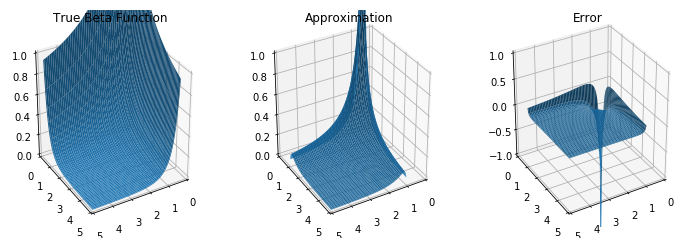

In [4]:
## Plot

# Create a figure with three subplots
fig = plt.figure(figsize=plt.figaspect(0.33))

# First subplot - True Beta Function
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
# Plot the surface.
surf = ax1.plot_surface(A_beta, B_beta, special.beta(A_beta, B_beta))
# Customize the z axis.
ax1.set_zlim(0, 1.0)
ax1.set_xlim(0, 5.0)
ax1.set_ylim(0, 5.0)
ax1.view_init(30, 60)
ax1.set_title('True Beta Function')

# Second subplot - Approximation
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
# Plot the surface.
surf = ax2.plot_surface(A_approx, B_approx, Approx(A_approx, B_approx))
# Customize the z axis.
ax2.set_zlim(0, 1.0)
ax2.set_xlim(0, 5.0)
ax2.set_ylim(0, 5.0)
ax2.view_init(30, 60)
ax2.set_title('Approximation')

# Third subplot - Error
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
# Plot the surface.
surf = ax3.plot_surface(A_approx, B_approx, special.beta(A_approx, B_approx) - Approx(A_approx, B_approx))
# Customize the z axis.
ax3.set_zlim(-1.0, 1.0)
ax3.set_xlim(0, 5.0)
ax3.set_ylim(0, 5.0)
ax3.view_init(30, 60)
ax3.set_title('Error')

plt.show()